In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:
X1 = np.linspace(0,10,1000)
X2 = np.linspace(0,30,1000)
X = np.column_stack((X1,X2))

In [110]:
Y = X@np.matrix(np.row_stack(([.5,1.2,2.5],[1,3.2,3.7]))) + np.multiply(X,X)@np.matrix(np.row_stack(([1,2.2,.3],[.9,5.5,.7]))) + [4,2,7]+np.random.randn(1000,3)*[100,200,150]

matrix([[ 4.73659058e+00,  3.81675583e+02, -1.87935541e+02],
        [ 1.74007759e+02,  1.31539814e+01,  1.01021352e+01],
        [ 8.32289696e+01, -9.75623053e+01, -1.02595984e+02],
        ...,
        [ 9.14449529e+02,  4.92051587e+03,  8.50810075e+02],
        [ 9.28167237e+02,  5.08817803e+03,  9.98411527e+02],
        [ 8.99160443e+02,  5.15144224e+03,  8.19355468e+02]])

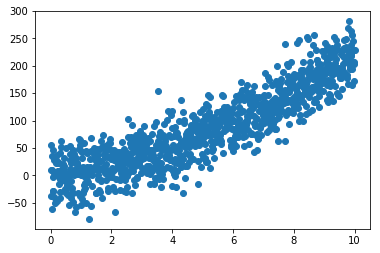

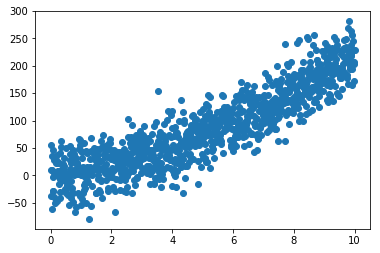

In [80]:
plt.scatter(X1,Y.T.tolist()[0])
plt.show()
plt.scatter(X2,Y.T.tolist()[0])
plt.show()

In [112]:
newX = (X-np.min(X, axis = 0))/(np.max(X, axis = 0)-np.min(X, axis = 0))
newY = (Y-np.min(Y, axis = 0))/(np.max(Y, axis = 0)-np.min(Y, axis = 0))

In [135]:
w1 = np.matrix(np.random.randn(2,6))
w2 = np.matrix(np.random.randn(6,3))
b1 = np.matrix(np.random.randn(1,6))
b2 = np.asscalar(np.random.randn(1,1))
errs = []
for i in range(0,100000):
    A1 = newX@w1 + b1
    Z1 = np.tanh(A1)
    A2 = Z1@w2 + b2
    phat = A2
    w1 = w1 - .00001*X.T@(np.multiply(
        (phat - newY)@w2.T,(1 - np.multiply(Z1,Z1))))
    w2 = w2 - .00001*Z1.T@(phat - newY)
    b1 = b1 - .00001*np.sum(np.multiply(
        (phat - newY)@w2.T,(1 - np.multiply(Z1,Z1))))
    b2 = b2 - .00001*np.sum(phat - newY)
    errs.append(np.sum(np.multiply((newY - phat),(newY - phat))))

16.388959681449393

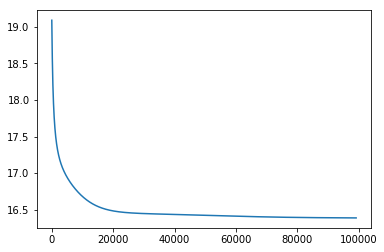

In [136]:
plt.plot(errs[800:])
errs[-1]

In [137]:
fakex = np.linspace(0,1,1000)
fakex2 = np.linspace(0,1,1000)
fakeX = np.column_stack((fakex,fakex2))
A1 = fakeX@w1 + b1
Z1 = np.tanh(A1)
A2 = Z1@w2 + b2
phat = A2


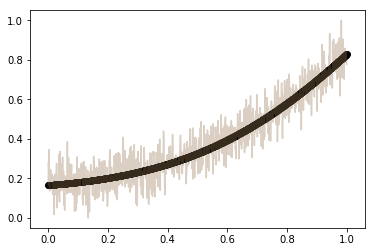

In [139]:
plt.plot(newX,newY.T.tolist()[0], alpha = .2)
plt.scatter(fakex,phat.T.tolist()[0],c = 'black')

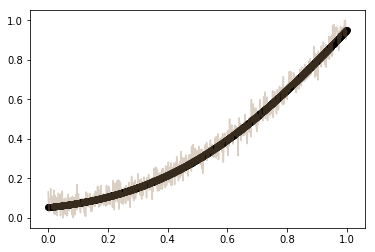

In [140]:
plt.plot(newX,newY.T.tolist()[1], alpha = .2)
plt.scatter(fakex,phat.T.tolist()[1],c = 'black')

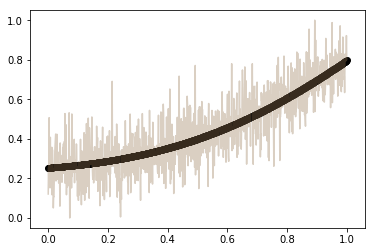

In [141]:
plt.plot(newX,newY.T.tolist()[2], alpha = .2)
plt.scatter(fakex,phat.T.tolist()[2],c = 'black')

In [120]:
phat

matrix([[ 0.10706874, -0.07914079,  0.16399983],
        [ 0.10741009, -0.07822681,  0.16464529],
        [ 0.10775226, -0.07731274,  0.16529051],
        ...,
        [ 0.72005677,  0.78583096,  0.68111863],
        [ 0.72071948,  0.78655575,  0.68153021],
        [ 0.72138179,  0.78728009,  0.68194164]])

In [125]:
phat.T.tolist()[1]

[-0.07914079063512891,
 -0.07822681046480517,
 -0.07731273626853818,
 -0.07639856850903759,
 -0.07548430764961656,
 -0.07456995415419576,
 -0.07365550848730118,
 -0.07274097111406408,
 -0.07182634250022013,
 -0.07091162311211097,
 -0.06999681341668262,
 -0.06908191388148555,
 -0.06816692497467458,
 -0.0672518471650081,
 -0.06633668092184974,
 -0.06542142671516538,
 -0.06450608501552546,
 -0.06359065629410221,
 -0.06267514102267158,
 -0.06175953967361236,
 -0.060843852719905334,
 -0.059928080635133885,
 -0.05901222389348315,
 -0.0580962829697389,
 -0.05718025833929041,
 -0.05626415047812583,
 -0.055347959862835916,
 -0.054431686970610293,
 -0.05351533227924077,
 -0.05259889626711689,
 -0.05168237941322995,
 -0.050765782197170095,
 -0.04984910509912566,
 -0.048932348599883824,
 -0.04801551318083197,
 -0.047098599323954105,
 -0.04618160751183242,
 -0.04526453822764642,
 -0.04434739195517334,
 -0.04343016917878728,
 -0.0425128703834583,
 -0.0415954960547531,
 -0.04067804667883412,
 -0.0397